In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
dataset_path = "./data/Housing.csv"

# Load dataset
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [ ]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols, columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

print(encoded_df)


        price  area  bedrooms  ...  airconditioning  prefarea  furnishingstatus
0    13300000  7420         4  ...              1.0       1.0               0.0
1    12250000  8960         4  ...              1.0       0.0               0.0
2    12250000  9960         3  ...              0.0       1.0               1.0
3    12215000  7500         4  ...              1.0       1.0               0.0
4    11410000  7420         4  ...              1.0       0.0               0.0
..        ...   ...       ...  ...              ...       ...               ...
540   1820000  3000         2  ...              0.0       0.0               2.0
541   1767150  2400         3  ...              0.0       0.0               1.0
542   1750000  3620         2  ...              0.0       0.0               2.0
543   1750000  2910         3  ...              0.0       0.0               0.0
544   1750000  3850         3  ...              0.0       0.0               2.0

[545 rows x 13 columns]


In [7]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

X, y = dataset_arr[:, 1:], dataset_arr[:, 0]
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of val samples: {X_val.shape[0]}")

Number of training samples: 381
Number of val samples: 164


In [ ]:
regressor = GradientBoostingRegressor(random_state=random_state, learning_rate=0.1)

regressor.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [10]:
y_pred = regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


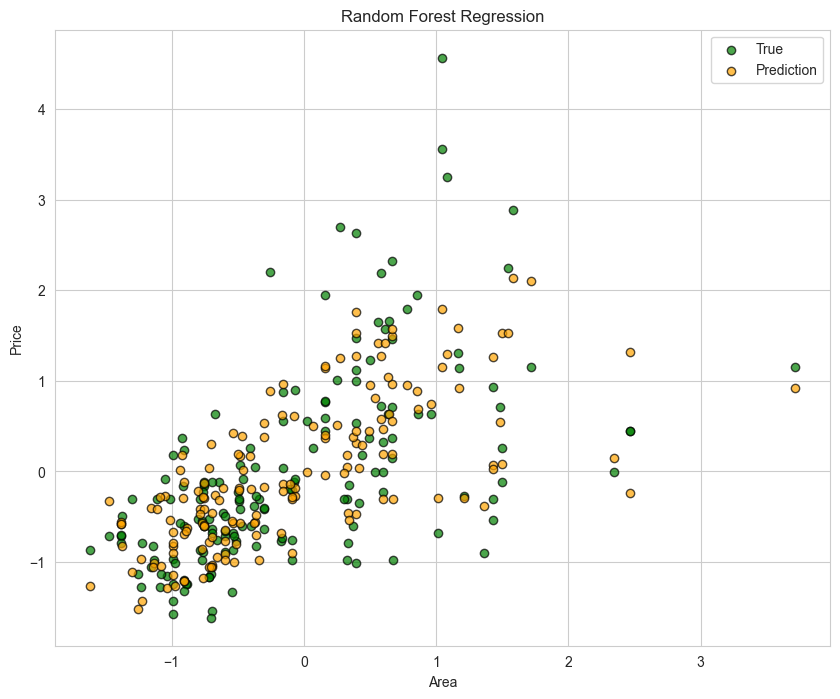

In [ ]:
# Cấu hình Seaborn để biểu đồ trông đẹp hơn
sns.set_style("whitegrid")

# Tạo một hình vẽ và một trục
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ cho giá trị thực tế
plt.scatter(X_val[:, 0], y_val, color="green", label="True", alpha=0.7, edgecolor="k")

# Vẽ biểu đồ cho giá trị dự đoán
plt.scatter(
    X_val[:, 0], y_pred, color="orange", label="Prediction", alpha=0.7, edgecolor="k"
)

# Thêm tiêu đề và nhãn
plt.title("Gradient Boosting Regression")
plt.xlabel("Area")
plt.ylabel("Price")

# Thêm chú thích và lưới
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()